In [ ]:
install.packages('forestmangr')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘cowplot’, ‘Deriv’, ‘microbenchmark’, ‘zoo’, ‘xts’, ‘SparseM’, ‘MatrixModels’, ‘mvtnorm’, ‘TH.data’, ‘numDeriv’, ‘doBy’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘bitops’, ‘lmtest’, ‘sandwich’, ‘ggpp’, ‘confintr’, ‘polynom’, ‘quantreg’, ‘lmodel2’, ‘splus2R’, ‘multcomp’, ‘multcompView’, ‘carData’, ‘abind’, ‘Formula’, ‘pbkrtest’, ‘lme4’, ‘reshape2’, ‘RCurl’, ‘ggthemes’, ‘plyr’, ‘systemfit’, ‘ggpmisc’, ‘car’, ‘minpack.lm’, ‘FinCal’, ‘ggdendro’, ‘gridExtra’




In [ ]:
require(tidyverse)
require(forestmangr)

Loading required package: tidyverse

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: forestmangr



In [ ]:
# importa dados de inventário contínuo
inventario <- read_csv('inventario.csv')
print(inventario)

Rows: 1842 Columns: 19
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (3): CLONE, ESPECIE, ESPAC
dbl (16): FAZENDA, TALHAO, PARCELA, IDADE, IDADE_MES, MED, Q, DAP, HT, HD, B...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# A tibble: 1,842 × 19
   FAZENDA TALHAO PARCELA CLONE IDADE IDADE_MES   MED     Q   DAP    HT    HD
     <dbl>  <dbl>   <dbl> <chr> <dbl>     <dbl> <dbl> <dbl> <dbl> <dbl> <dbl>
 1       1     23       1 0003   2.26        27     1  9.96  9.78  15.1  16.8
 2       1     23       1 0003   3.01        36     2 11.3  11.1   18.1  20.9
 3       1     23       1 0003   3.93        47     3 11.8  11.6   20.0  23.3
 4       1     23       1 0003   5.01        60     4 13.0  12.6   21.7  25.4
 5       1     23       1 0003   6.01        72     5 13.3  12.9   23.0  27.1
 6       1     23       1 0003   7.01        84     6 13.8  13.4   24.9  30  
 7       1     23       1 0003   8.01        96     7 14.5  14.0   26.1  31.4
 8       1     23       2 0003   2.26        27     1 11.3  11.1   15.7  16.5
 9       1     23       2 0003   3.01        36     2 12.4  12.2   17.6  19  
10       1     23       2 0003   3.93        47     3 13.1  12.9   19.0  20.3
# ℹ 1,832 more rows
# ℹ 8 more variables:

Quantos talhões tiveram o crescimento monitorado no inventário?

In [ ]:
inventario %>% mutate(chave = paste0('F',FAZENDA, 'T', TALHAO)) %>% distinct(chave) %>% nrow()

[1] 169

Com qual idade é feita a primeira medição? Qual a maior idade em que se faz medição?

In [ ]:
summary(inventario$IDADE)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.640   2.980   4.110   4.324   5.558   8.210 

Esta floresta foi conduzida com os mesmos tratamentos silviculturais?

In [ ]:
inventario %>% distinct(ESPAC)

ESPAC
<chr>
"3,00x3,00"
"4,00x2,75"
"3,00x3,65"
"3,50x2,60"


In [ ]:
inventario %>% distinct(CLONE)

CLONE
<chr>
0003
0013
0034
0039
0595
0421
0361
0428
0433


Quais os valores mínimo e máximo de produção desta floresta aos 7 anos?

In [ ]:
inventario %>% filter(round(IDADE, 0) == 7) %>% select(VCCC) %>% summary()

      VCCC      
 Min.   :133.1  
 1st Qu.:238.8  
 Median :299.8  
 Mean   :293.6  
 3rd Qu.:343.9  
 Max.   :477.8  

Qual a amplitude (máximo e mínimo) da HD na base de dados?

In [ ]:
inventario %>% select(HD) %>% summary()

       HD       
 Min.   : 7.60  
 1st Qu.:19.10  
 Median :23.25  
 Mean   :23.10  
 3rd Qu.:27.50  
 Max.   :37.00  

Qual a amplitude (máximo e mínimo) da HD na base de dados, considerando apenas a idade de 5 anos?

In [ ]:
inventario %>% filter(round(IDADE, 0) == 5) %>% select(HD) %>% summary()

       HD       
 Min.   :19.25  
 1st Qu.:24.50  
 Median :26.10  
 Mean   :26.15  
 3rd Qu.:27.50  
 Max.   :33.50  

Crie o gráfico HD (eixo y)  vs idade para a sua base de dados.

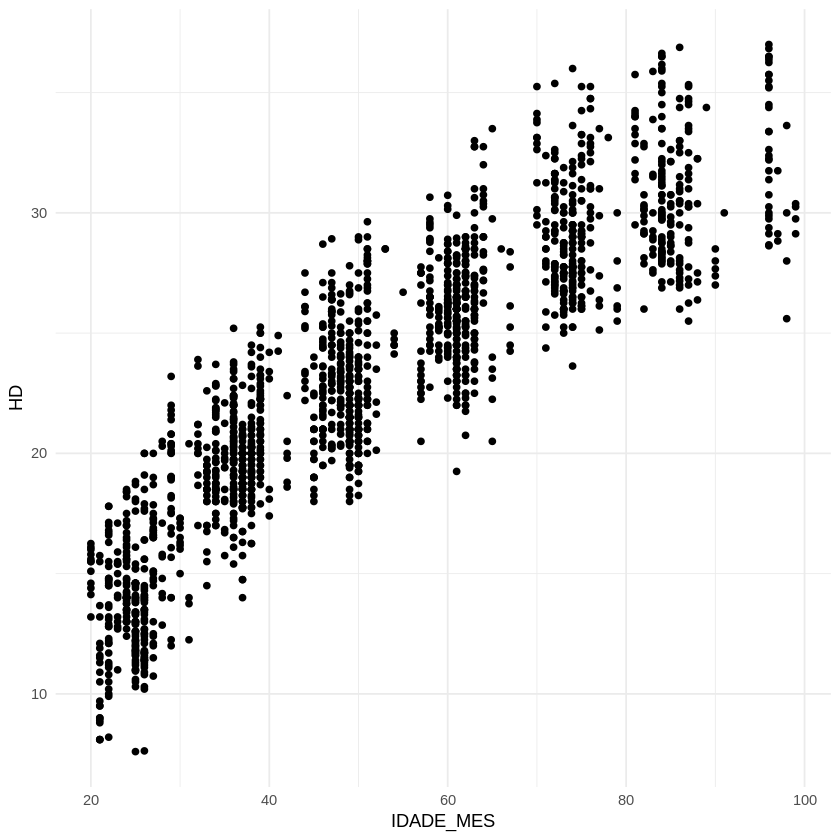

In [ ]:
ggplot(inventario, aes(IDADE_MES, HD)) + geom_point() + theme_minimal()

Ajuste do modelo ln(HD) = b0 + b1 * (1/IDADE_MES)

In [ ]:
inventario %>%
  lm_table(log(HD) ~ inv(IDADE_MES))

b0,b1,Rsqr,Rsqr_adj,Std.Error
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3.695552,-25.99362,0.8234763,0.8233803,0.1199403


Plote as curvas de sítio

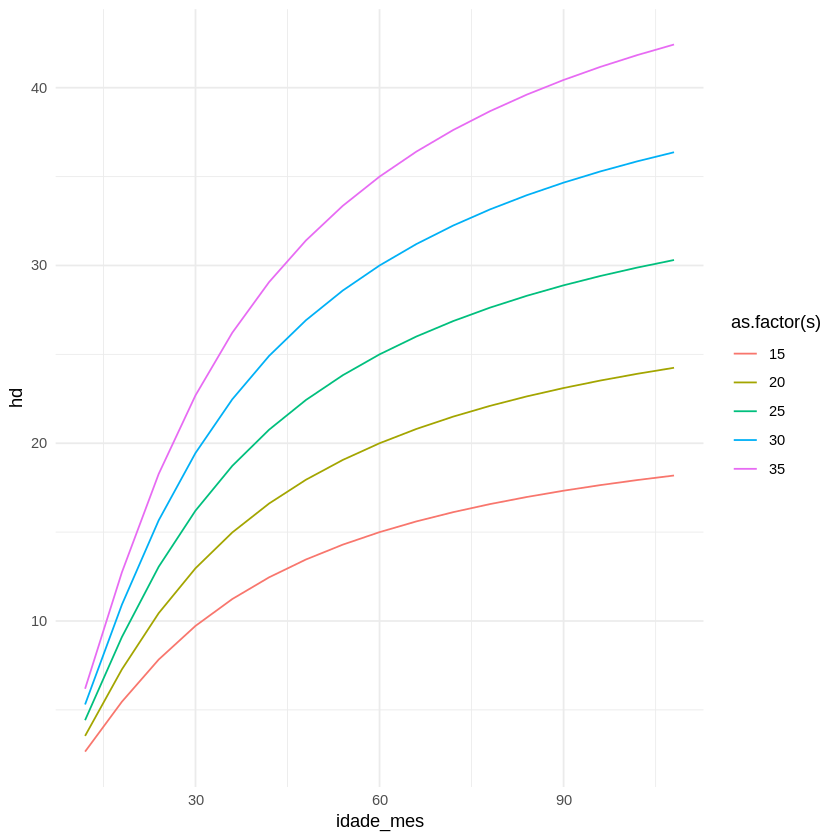

In [ ]:
sitio <- seq(15, 35, 5)
idade_mes <- seq(12, 9*12, 6)
curvasSitio <- expand.grid(sitio, idade_mes) %>% rename(s = Var1, idade_mes = Var2) %>% mutate(hd = exp(log(s) - 25.9936 * (inv(idade_mes) - inv(60))))
ggplot(curvasSitio, aes(idade_mes, hd, colour = as.factor(s))) + geom_line() + theme_minimal()

Apresenta tabela de curva de sítio

In [ ]:
curvasSitio %>%
  pivot_wider(names_from = s, values_from = hd)

idade_mes,15,20,25,30,35
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
12,2.651548,3.535397,4.419246,5.303096,6.186945
18,5.458576,7.278102,9.097627,10.917152,12.736678
24,7.831940,10.442586,13.053233,15.663879,18.274526
30,9.726203,12.968270,16.210338,19.452405,22.694473
36,11.237231,14.982974,18.728718,22.474461,26.220205
42,12.458232,16.610976,20.763720,24.916465,29.069209
48,13.460285,17.947047,22.433809,26.920571,31.407333
54,14.295058,19.060078,23.825097,28.590117,33.355136
60,15.000000,20.000000,25.000000,30.000000,35.000000


Calcular indice de sítio para cada parcela

In [1]:
idade_indice <- 60
inventario <- inventario %>%
  lm_table(log(HD) ~ inv(IDADE_MES),
            output = "merge" ) %>%
  mutate(S = exp(log(HD) - b1 * (inv(IDADE_MES) - inv(idade_indice))))

ERROR: Error in inventario %>% lm_table(log(HD) ~ inv(IDADE_MES), output = "merge") %>% : could not find function "%>%"


In [ ]:
head(inventario)

FAZENDA,TALHAO,PARCELA,CLONE,IDADE,IDADE_MES,MED,Q,DAP,HT,⋯,VCSC,FUSTES,ESPECIE,ESPAC,b0,b1,Rsqr,Rsqr_adj,Std.Error,S
<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,23,1,0003,2.26,27,1,9.96,9.78,15.08,⋯,44.65,1127,GRD,"3,00x3,00",3.695552,-25.99362,0.8234763,0.8233803,0.1199403,28.52778
1,23,1,0003,3.01,36,2,11.32,11.09,18.10,⋯,77.54,1127,GRD,"3,00x3,00",3.695552,-25.99362,0.8234763,0.8233803,0.1199403,27.89834
1,23,1,0003,3.93,47,3,11.85,11.58,20.01,⋯,99.09,1127,GRD,"3,00x3,00",3.695552,-25.99362,0.8234763,0.8233803,0.1199403,26.30000
1,23,1,0003,5.01,60,4,12.99,12.62,21.74,⋯,133.29,1127,GRD,"3,00x3,00",3.695552,-25.99362,0.8234763,0.8233803,0.1199403,25.42000
1,23,1,0003,6.01,72,5,13.28,12.89,22.97,⋯,150.26,1127,GRD,"3,00x3,00",3.695552,-25.99362,0.8234763,0.8233803,0.1199403,25.24014
1,23,1,0003,7.01,84,6,13.85,13.38,24.94,⋯,184.72,1127,GRD,"3,00x3,00",3.695552,-25.99362,0.8234763,0.8233803,0.1199403,26.50725
1,23,1,0003,8.01,96,7,14.52,14.03,26.14,⋯,208.19,1103,GRD,"3,00x3,00",3.695552,-25.99362,0.8234763,0.8233803,0.1199403,26.67457
1,23,2,0003,2.26,27,1,11.27,11.11,15.71,⋯,56.28,1034,GRD,"3,00x3,00",3.695552,-25.99362,0.8234763,0.8233803,0.1199403,28.01836
1,23,2,0003,3.01,36,2,12.37,12.19,17.60,⋯,79.83,1034,GRD,"3,00x3,00",3.695552,-25.99362,0.8234763,0.8233803,0.1199403,25.36213


In [ ]:
sitioTalhao <- inventario %>%
  group_by(FAZENDA, TALHAO) %>%
  summarise(S = mean(S))

`summarise()` has grouped output by 'FAZENDA'. You can override using the
`.groups` argument.


In [ ]:
sitioTalhao %>% mutate(Sclass = ifelse(S < 17.5, "Muito Baixo",
  ifelse(S < 22.5, "Baixo",
  ifelse(S < 27.5, "Médio",
  ifelse(S < 32.5, "Alto", "Muito Alto")))))

FAZENDA,TALHAO,S,Sclass
<dbl>,<dbl>,<dbl>,<chr>
1,1,27.28014,Médio
1,2,24.52885,Médio
1,3,26.72334,Médio
1,4,28.32823,Alto
1,9,27.63933,Alto
1,18,28.69735,Alto
1,23,25.81197,Médio
1,32,24.95484,Médio
1,33,26.56297,Médio
